notMNIST_small/A.pickle already present - Skipping pickling.
notMNIST_small/B.pickle already present - Skipping pickling.
notMNIST_small/C.pickle already present - Skipping pickling.
notMNIST_small/D.pickle already present - Skipping pickling.
notMNIST_small/E.pickle already present - Skipping pickling.
notMNIST_small/F.pickle already present - Skipping pickling.
notMNIST_small/G.pickle already present - Skipping pickling.
notMNIST_small/H.pickle already present - Skipping pickling.
notMNIST_small/I.pickle already present - Skipping pickling.
notMNIST_small/J.pickle already present - Skipping pickling.
notMNIST_large/A.pickle already present - Skipping pickling.
notMNIST_large/B.pickle already present - Skipping pickling.
notMNIST_large/C.pickle already present - Skipping pickling.
notMNIST_large/D.pickle already present - Skipping pickling.
notMNIST_large/E.pickle already present - Skipping pickling.
notMNIST_large/F.pickle already present - Skipping pickling.
notMNIST_large/G.pickle 

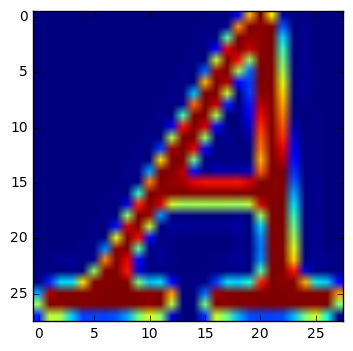

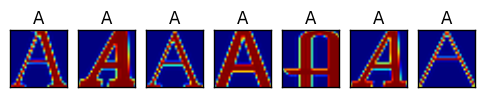

Numero de exemplos para classe A: 52909
Numero de exemplos para classe B: 52911
Numero de exemplos para classe C: 52912
Numero de exemplos para classe D: 52911
Numero de exemplos para classe E: 52912
Numero de exemplos para classe F: 52912
Numero de exemplos para classe G: 52912
Numero de exemplos para classe H: 52912
Numero de exemplos para classe I: 52912
Numero de exemplos para classe J: 52911
Training: (200000, 28, 28) (200000,)
Validation: (10000, 28, 28) (10000,)
Testing: (10000, 28, 28) (10000,)
Compressed pickle size: 690800441


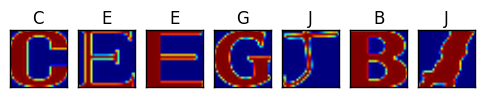

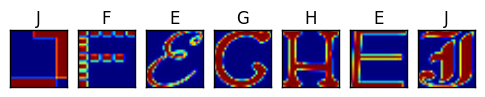

In [14]:
# -*- coding: <encoding-name> -*-

# These are all the modules we'll be using later. Make sure you can import them
# before proceeding further.
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
import os
import sys 
import tarfile
from IPython.display import display, Image
from scipy import ndimage
from sklearn.linear_model import LogisticRegression
from six.moves.urllib.request import urlretrieve
from six.moves import cPickle as pickle

encoding="utf-8"

image_size = 28  # Pixel width and height.
pixel_depth = 255.0  # Number of levels per pixel.
num_classes = 10
np.random.seed(133)

def load_letter(folder, min_num_images):
  """Load the data for a single letter label."""
  image_files = os.listdir(folder)
  dataset = np.ndarray(shape=(len(image_files), image_size, image_size),
                         dtype=np.float32)
  print(folder)
  num_images = 0
  for image in image_files:
    image_file = os.path.join(folder, image)
    try:
      image_data = (ndimage.imread(image_file).astype(float) - 
                    pixel_depth / 2) / pixel_depth
      if image_data.shape != (image_size, image_size):
        raise Exception('Unexpected image shape: %s' % str(image_data.shape))
      dataset[num_images, :, :] = image_data
      num_images = num_images + 1
    except IOError as e:
      print('Could not read:', image_file, ':', e, '- it\'s ok, skipping.')
    
  dataset = dataset[0:num_images, :, :]
  if num_images < min_num_images:
    raise Exception('Many fewer images than expected: %d < %d' %
                    (num_images, min_num_images))
    
  print('Full dataset tensor:', dataset.shape)
  print('Mean:', np.mean(dataset))
  print('Standard deviation:', np.std(dataset))
  return dataset

# Config the matplotlib backend as plotting inline in IPython
%matplotlib inline



#root_test="/home/christian/udacity/ML/Ex 1/notMNIST_small"
#root_train="/home/christian/udacity/ML/Ex 1/notMNIST_large"

root_test="notMNIST_small/"
root_train="notMNIST_large/"

data_folders = [
    os.path.join(root_test, d) for d in sorted(os.listdir(root_test))
    if os.path.isdir(os.path.join(root_test, d))]

test_folders = data_folders
test_folders = [root_test+'A',root_test+'B',root_test+'C',root_test+'D',root_test+'E',root_test+'F',root_test+'G',root_test+'H',root_test+'I',root_test+'J']

data_folders = [
    os.path.join(root_train, d) for d in sorted(os.listdir(root_train))
    if os.path.isdir(os.path.join(root_train, d))]

train_folders = data_folders
train_folders = [root_train+'A',root_train+'B',root_train+'C',root_train+'D',root_train+'E',root_train+'F',root_train+'G',root_train+'H',root_train+'I',root_train+'J']

# creating pickle for test
dataset_names = []
for folder in test_folders:
    set_filename = folder + '.pickle'
    dataset_names.append(set_filename)
    if os.path.exists(set_filename): 
      # You may override by setting force=True.
      print('%s already present - Skipping pickling.' % set_filename)
    else:
      print('Pickling %s.' % set_filename)
      dataset = load_letter(folder, 1800)
      try:
        with open(set_filename, 'wb') as f:
          pickle.dump(dataset, f, pickle.HIGHEST_PROTOCOL)
      except Exception as e:
        print('Unable to save data to', set_filename, ':', e)


test_datasets = dataset_names

#for name in test_datasets:
    #print(name)

#  creating pickle for train
dataset_names = []
for folder in train_folders:
    set_filename = folder + '.pickle'
    dataset_names.append(set_filename)
    if os.path.exists(set_filename): 
      # You may override by setting force=True.
      print('%s already present - Skipping pickling.' % set_filename)
    else:
      print('Pickling %s.' % set_filename)
      dataset = load_letter(folder, 1800)
      try:
        with open(set_filename, 'wb') as f:
          pickle.dump(dataset, f, pickle.HIGHEST_PROTOCOL)
      except Exception as e:
        print('Unable to save data to', set_filename, ':', e)

train_datasets = dataset_names

#for name in train_datasets:
 #   print(name)

#Problem 2 - Displaying a sample of the labels and images from the ndarray.
x = open(test_datasets[0],'rb') # abre o arquivo A.pickle com todas as imagens A
dataset_test_A = pickle.load(x) # carrega as imagemns que haviam sida persistidas
print(dataset_test_A.shape) 
print(dataset_test_A[0][0])
plt.imshow(dataset_test_A[0,0:28,0:28]) # primeira imagem A
plt.show()
indices=random.sample(range(0,dataset_test_A.shape[0]),7)
fig=plt.figure()
for i in range(7):
 a=fig.add_subplot(1,7,i+1)
 plt.imshow(dataset_test_A[indices[i],:,:])   
 a.set_title(('A'))
 a.axes.get_xaxis().set_visible(False)
 a.axes.get_yaxis().set_visible(False)
plt.show()  

# Problem 3 - Another check: we expect the data to be balanced across classes. Verify that
print('Numero de exemplos para classe A:',pickle.load(open(train_datasets[0],'rb')).shape[0])
print('Numero de exemplos para classe B:',pickle.load(open(train_datasets[1],'rb')).shape[0])
print('Numero de exemplos para classe C:',pickle.load(open(train_datasets[2],'rb')).shape[0])
print('Numero de exemplos para classe D:',pickle.load(open(train_datasets[3],'rb')).shape[0])
print('Numero de exemplos para classe E:',pickle.load(open(train_datasets[4],'rb')).shape[0])
print('Numero de exemplos para classe F:',pickle.load(open(train_datasets[5],'rb')).shape[0])
print('Numero de exemplos para classe G:',pickle.load(open(train_datasets[6],'rb')).shape[0])
print('Numero de exemplos para classe H:',pickle.load(open(train_datasets[7],'rb')).shape[0])
print('Numero de exemplos para classe I:',pickle.load(open(train_datasets[8],'rb')).shape[0])
print('Numero de exemplos para classe J:',pickle.load(open(train_datasets[9],'rb')).shape[0])



def make_arrays(nb_rows, img_size):
  if nb_rows:
    dataset = np.ndarray((nb_rows, img_size, img_size), dtype=np.float32)
    labels = np.ndarray(nb_rows, dtype=np.int32)
  else:
    dataset, labels = None, None
  return dataset, labels


def merge_datasets(pickle_files, train_size, valid_size=0):
  num_classes = len(pickle_files)
  valid_dataset, valid_labels = make_arrays(valid_size, image_size)
  train_dataset, train_labels = make_arrays(train_size, image_size)
  vsize_per_class = valid_size // num_classes
  tsize_per_class = train_size // num_classes
    
  start_v, start_t = 0, 0
  end_v, end_t = vsize_per_class, tsize_per_class
  end_l = vsize_per_class+tsize_per_class
  for label, pickle_file in enumerate(pickle_files):       
    try:
      with open(pickle_file, 'rb') as f:
        letter_set = pickle.load(f)
        # let's shuffle the letters to have random validation and training set
        np.random.shuffle(letter_set)
        if valid_dataset is not None:
          valid_letter = letter_set[:vsize_per_class, :, :]
          valid_dataset[start_v:end_v, :, :] = valid_letter
          valid_labels[start_v:end_v] = label
          start_v += vsize_per_class
          end_v += vsize_per_class
                    
        train_letter = letter_set[vsize_per_class:end_l, :, :]
        train_dataset[start_t:end_t, :, :] = train_letter
        train_labels[start_t:end_t] = label
        start_t += tsize_per_class
        end_t += tsize_per_class
    except Exception as e:
      print('Unable to process data from', pickle_file, ':', e)
      raise
    
  return valid_dataset, valid_labels, train_dataset, train_labels
            
train_size = 200000
valid_size = 10000
test_size = 10000
 
# cria um arquivo de validacao a partir do de treino, separa as labels em um array (tanto de validacao como de treino)
# faz um merge de todas as letras em um mesmo array
valid_dataset, valid_labels, train_dataset, train_labels = merge_datasets(
  train_datasets, train_size, valid_size)
_, _, test_dataset, test_labels = merge_datasets(test_datasets, test_size)

print('Training:', train_dataset.shape, train_labels.shape)
print('Validation:', valid_dataset.shape, valid_labels.shape)
print('Testing:', test_dataset.shape, test_labels.shape)

def randomize(dataset, labels):
  permutation = np.random.permutation(labels.shape[0])
  shuffled_dataset = dataset[permutation,:,:]
  shuffled_labels = labels[permutation]
  return shuffled_dataset, shuffled_labels

train_dataset, train_labels = randomize(train_dataset, train_labels)
test_dataset, test_labels = randomize(test_dataset, test_labels)
valid_dataset, valid_labels = randomize(valid_dataset, valid_labels)

pickle_file = 'notMNIST.pickle'

try:
  f = open(pickle_file, 'wb')
  save = {
    'train_dataset': train_dataset,
    'train_labels': train_labels,
    'valid_dataset': valid_dataset,
    'valid_labels': valid_labels,
    'test_dataset': test_dataset,
    'test_labels': test_labels,
    }
  pickle.dump(save, f, pickle.HIGHEST_PROTOCOL)
  f.close()
except Exception as e:
  print('Unable to save data to', pickle_file, ':', e)
  raise

statinfo = os.stat(pickle_file)
print('Compressed pickle size:', statinfo.st_size)


# Problem 2
import random
def showProcessedRandom(dataset,labels,n): # shows size of the sample
    indices=random.sample(range(0,labels.shape[0]),n)
    fig=plt.figure()
    for i in range(n):
        a=fig.add_subplot(1,n,i+1)
        plt.imshow(dataset[indices[i],:,:])
        a.set_title(chr(labels[indices[i]]+ord('A')))
        a.axes.get_xaxis().set_visible(False)
        a.axes.get_yaxis().set_visible(False)
    plt.show()
    
showProcessedRandom(train_dataset, train_labels, 7)
showProcessedRandom(test_dataset, test_labels, 7)